### Import implementation classes

In [2]:
from SchedulingProblem import ProjectSchedulingModel
from ArtificialBeeColony import ArtificialBeeColony, Parameters, InitParams

### Load problems instances

In [3]:
from Utils import loadProblems, loadBestKnown
PATHS = ["j30.sm/j30", "j60.sm/j60", "j90.sm/j90", "j120.sm/j120"]
print("Loading problems and best known solutions...")
# Load problem sets
problems_data = {path.split(".")[0]: loadProblems(path) for path in PATHS}
# Load best known solutions
best_known_data = {f"j{i}": loadBestKnown(i) for i in [30, 60, 90, 120]}

# Assign best_known solutions to problem instances
for key in problems_data.keys():
    if key in best_known_data:
        current_problems = problems_data[key]
        current_best_known = best_known_data[key]
        for i, best_val in enumerate(current_best_known):
            if i < len(current_problems):
                current_problems[i].best_known = best_val
            else:
                # This case should ideally not happen if data is consistent
                print(f"Warning: More best_known values than problems for {key}. Index {i} is out of bounds for problems list (length {len(current_problems)}).")
    else:
        print(f"Warning: No best_known data found for problem key {key}.")

Loading problems and best known solutions...


### Instantiate ABC optimizer

In [23]:
n = 320
problem = problems_data["j30"][n]
abc = ArtificialBeeColony(psmodel=problem)
init_params = InitParams(heuristics_rate=0.5, sampling_rate=1000)
params = Parameters(N=15, limit=125, max_evaluations=50000)

### Solve

In [24]:
best_solution = abc.optimize(params=params, init="mcmc", mode="abc")
history = abc.history
population_diversity = abc.population_divsersity
nscout_bees = abc.nscout_bees
nunique_individuals = abc.nunique_individuals

### Show results

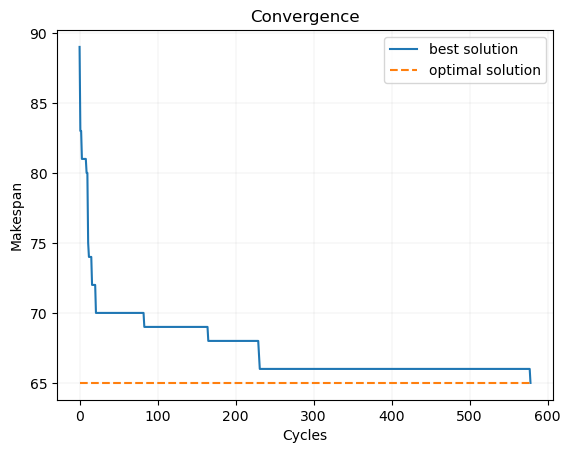

In [25]:
import matplotlib.pyplot as plt

plt.plot([s.get_makespan() for s in history], label='best solution')
plt.plot([problem.best_known] * len(history), linestyle='--', label='optimal solution')

plt.xlabel('Cycles')
plt.ylabel('Makespan')
plt.title('Convergence')
plt.grid(True, which='both', linestyle='-', linewidth=0.25, alpha=0.5)
plt.legend()

plt.show()

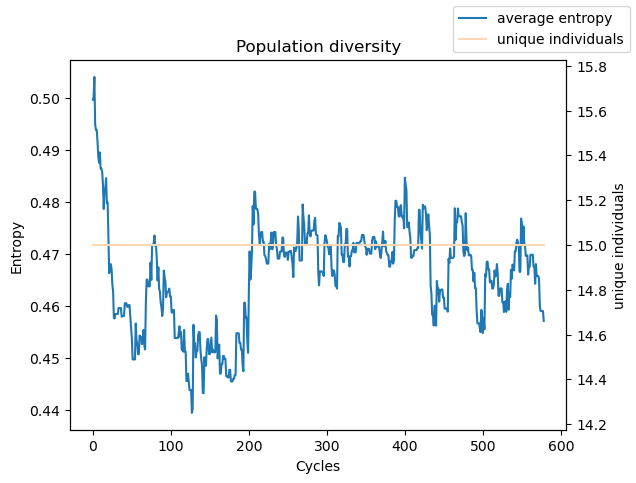

In [26]:
# Sample data
x = [i for i in range(len(population_diversity))]
y1 = population_diversity      # First dataset
y2 = nunique_individuals
# Create a figure and axis
fig, ax1 = plt.subplots()

color1 = '#1f77b4'  # blue from Tableau palette
color2 = "#fcd6b5"  # orange from Tableau palette

# Plot the first dataset
ax1.plot(x, y1, label='average entropy', color=color1)
ax1.set_xlabel('Cycles')
ax1.set_ylabel('Entropy')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()
ax2.plot(x, y2, color=color2, label='unique individuals')
ax2.set_ylabel('unique individuals')
ax2.tick_params(axis='y')

fig.legend()
# Show the plot
plt.title("Population diversity")
plt.show()


In [10]:
print(best_solution)

Event 0 at time 0, jobs: 1, 3, 4
Event 1 at time 2, jobs: 2, 6
Event 2 at time 4, jobs: 12
Event 3 at time 5, jobs: 7, 11
Event 4 at time 6, jobs: 5
Event 5 at time 8, jobs: 15
Event 6 at time 13, jobs: 18, 14
Event 7 at time 17, jobs: 21
Event 8 at time 18, jobs: 8, 31
Event 9 at time 21, jobs: 24
Event 10 at time 25, jobs: 19
Event 11 at time 27, jobs: 9, 17, 27
Event 12 at time 28, jobs: 10
Event 13 at time 35, jobs: 23
Event 14 at time 36, jobs: 13
Event 15 at time 40, jobs: 16, 28
Event 16 at time 46, jobs: 20
Event 17 at time 47, jobs: 22, 25
Event 18 at time 50, jobs: 29, 26
Event 19 at time 51, jobs: 30
Event 20 at time 59, jobs: 32



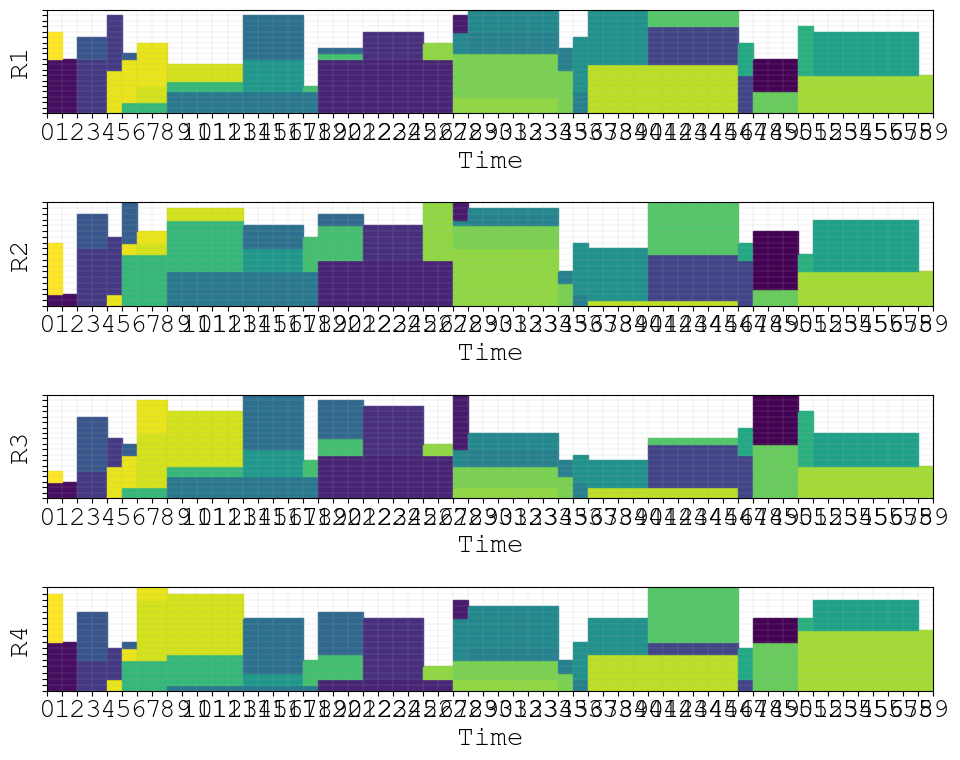

In [11]:
best_solution.plot()

In [10]:
# solutions = []
# for p in problems:
#     abc = ArtificialBeeColony(psmodel=p)
#     h = abc.optimize(params=params)
#     solutions.append(h)


In [11]:
# diff = []
# for i, sol in enumerate(solutions):
#     diff.append(sol.get_makespan() - optimal[i])

In [12]:
# print('ARPD:', sum(diff)*100/len(diff))
# print('optimal found in', len(list(filter(lambda x: x == 0, diff))), 'out of', len(diff))

In [4]:
abc = ArtificialBeeColony(psmodel=problems[0])

N = 200
population = abc.init_population(N)

p = [[job.id for job in p.jobs] for p in population]
p1 = p[0:N//2]
p2 = p[N//2:N]

In [5]:
import numpy as np

def positional_entropy(permutations):

    if not permutations:
        return 0.0, 0.0

    permutations = np.array(permutations)
    m, n = permutations.shape
    total_entropy = []

    for i in range(n):
        # Count occurrences of each value at position i
        counts = np.bincount(permutations[:, i], minlength=n + 1)[1:]  # skip index 0
        probs = counts[counts > 0] / m
        entropy = -np.sum(probs * np.log2(probs))
        total_entropy.append(entropy)

    return total_entropy

In [6]:
pos_entropy1 = positional_entropy(p1)
pos_entropy2 = positional_entropy(p2)

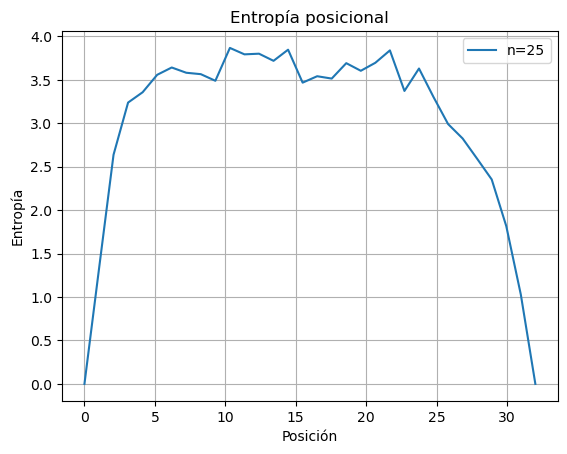

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Your KDE values
kde_values = pos_entropy1

# Make x-values assuming linear spacing (e.g., 32 points from 0 to 5)
x = np.linspace(0, len(kde_values), len(kde_values))

# Plot the KDE curve
plt.plot(x, kde_values, label="n=25")
plt.xlabel("Posición")
plt.ylabel("Entropía")
plt.title("Entropía posicional")
plt.grid(True)
plt.legend()
plt.show()